In [1]:
%matplotlib inline

import pandas as pd

In [2]:
def get_returns(file):
    """Reads data file from the disk and returns percentage change"""
    return pd.read_csv(file + '.csv', index_col=0, parse_dates=True).pct_change()

def get_data(file):
    """Fetch data from the disk"""
    data = pd.read_csv(file + '.csv', index_col='Date', parse_dates=['Date'])
    return data

def calc_corr(ser1, ser2, window):
    """Calculates correlation of two series"""
    ret1 = ser1.pct_change()
    ret2 = ser2.pct_change()
    corr = ret1.rolling(window).corr(ret2)
    return corr

In [3]:
df = get_returns('sp500')

In [4]:
df['NDX'] = get_returns('NDX')

In [5]:
df.tail()

,SP500,NDX
Date,,
2018-07-27,-0.006562,-0.014048
2018-07-30,-0.005754,-0.014209
2018-07-31,0.004885,0.005405
2018-08-01,-0.001040,0.005656
2018-08-02,0.004926,0.013648


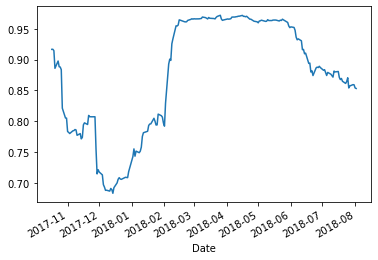

In [6]:
df['SP500'].rolling(50).corr(df['NDX'])[-200:].plot();

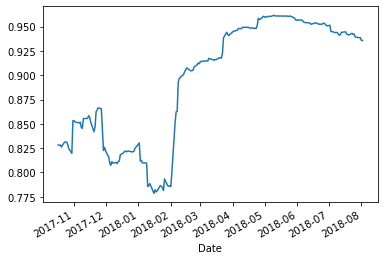

In [7]:
df['SP500'].rolling(100).corr(df['NDX'])[-200:].plot();

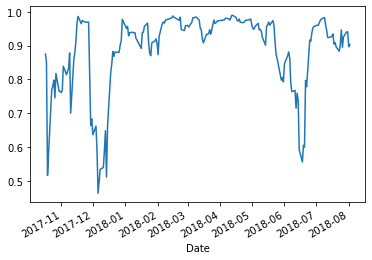

In [8]:
df['SP500'].rolling(10).corr(df['NDX'])[-200:].plot();

In [10]:
points_to_plot = 300

data = get_data('indexes')

In [13]:
for ind in data:
    data[ind + '_rebased'] = (data[-points_to_plot:][ind].pct_change() + 1).cumprod()

In [16]:
data.tail()

,SP500,NDX,SP500_rebased,NDX_rebased
Date,,,,
2018-07-27,2818.82,7296.781,1.167179,1.262774
2018-07-30,2802.60,7193.103,1.160463,1.244832
2018-07-31,2816.29,7231.983,1.166132,1.251560
2018-08-01,2813.36,7272.887,1.164919,1.258639
2018-08-02,2827.22,7372.148,1.170658,1.275817
